# Лабораторная работа №4
# Backpropagation 
Выполнили студенты Зимин Андрей Валерьевич, Жилин Андрей Игроевич

In [3]:
import numpy as np
from numpy.typing import NDArray

import pandas as pd
import random
import string
from typing import Callable, List, Union

from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import recall_score as rec
from sklearn.metrics import precision_score as pre
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder

from matplotlib.ticker import MaxNLocator
from matplotlib import pyplot as plt

import seaborn as sns



## Задание в классе. Предварительное исследование данных.
1. Загрузить данные из файлов «vinequality-red.csv» и «vinequality-white.csv» об образцах красного и белого вина, соответственно.  

In [4]:
df_red = pd.read_csv("./data/winequality-red.csv", sep=';')
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df_white = pd.read_csv("./data/winequality-white.csv", sep=';')
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Загрузили датасет. Дасет загрузился.

2. На основе загруженных данных формировать 3 датасета:  
A.	Параметры и качество белого вина (12 признаков, 4898 образцов) по данным второго файла,  
B.	Параметры и качество вина Vinho Verde (12 признаков, 6497 образцов), по данным обоих файлов.  
C.	Параметры и качество вина Vinho Verde (13 признаков, 6497 образцов), по данным обоих файлов, введя бинарный признак для отличия красного и белого вина.  

Распечатать размерность и первые 5 строк каждого датасета.


In [6]:
A = df_white
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [7]:
A.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [8]:
B = pd.concat([df_red, df_white]).reset_index()
B.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 6497 non-null   int64  
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [9]:
B.head()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
C = pd.concat([df_red, df_white]).reset_index()
C["is_red"] = [1]*df_red.shape[0] + [0]*df_white.shape[0]
C.head()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [11]:
C.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 6497 non-null   int64  
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
 13  is_red                6497 non-null   int64  
dtypes: float64(11), int64(3)
memory usage: 710.7 KB


Совсем непонятно почему именно так в задании нужно разделить. Получается что отдельно красное вино мы не рассматриваем, а только смотрим на белое и белое + красное

3. Построить гистограмму распределения значения признака «качество вина» по каждому датасету

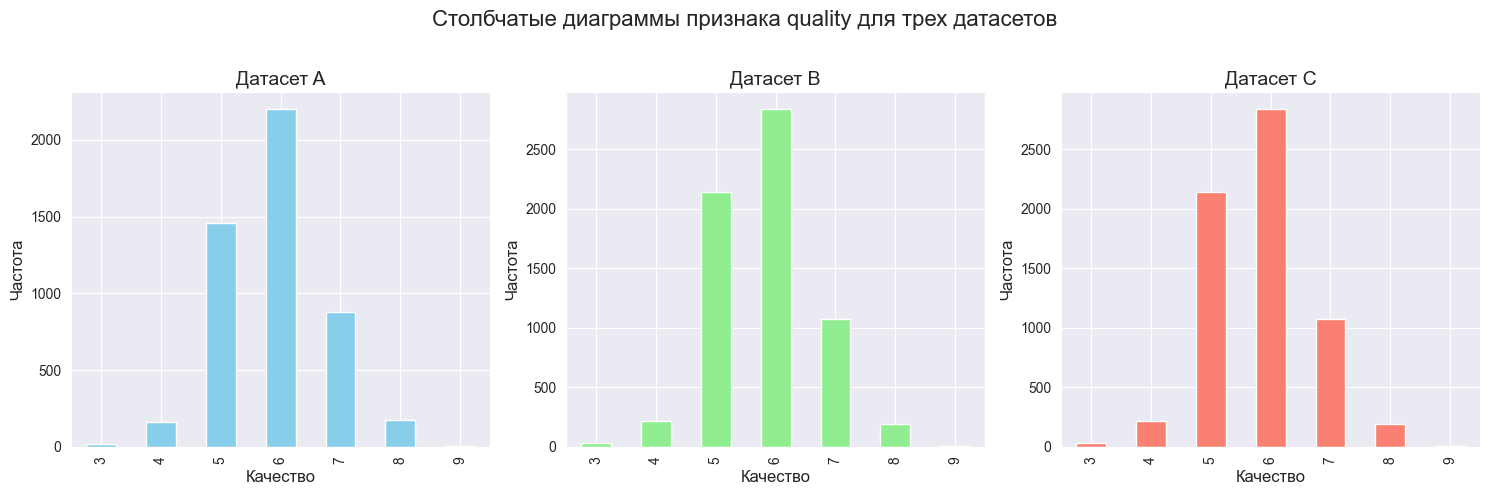

In [12]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

A['quality'].value_counts().sort_index().plot(kind='bar', ax=axs[0], color='skyblue')
axs[0].set_title('Датасет A', fontsize=14)
axs[0].set_xlabel('Качество', fontsize=12)
axs[0].set_ylabel('Частота', fontsize=12)
axs[0].set_xticks(range(len(A['quality'].value_counts().sort_index())))
axs[0].set_xticklabels(A['quality'].value_counts().sort_index().index)

B['quality'].value_counts().sort_index().plot(kind='bar', ax=axs[1], color='lightgreen')
axs[1].set_title('Датасет B', fontsize=14)
axs[1].set_xlabel('Качество', fontsize=12)
axs[1].set_ylabel('Частота', fontsize=12)
axs[1].set_xticks(range(len(B['quality'].value_counts().sort_index())))
axs[1].set_xticklabels(B['quality'].value_counts().sort_index().index)

C['quality'].value_counts().sort_index().plot(kind='bar', ax=axs[2], color='salmon')
axs[2].set_title('Датасет C', fontsize=14)
axs[2].set_xlabel('Качество', fontsize=12)
axs[2].set_ylabel('Частота', fontsize=12)
axs[2].set_xticks(range(len(C['quality'].value_counts().sort_index())))
axs[2].set_xticklabels(C['quality'].value_counts().sort_index().index)

plt.suptitle('Столбчатые диаграммы признака quality для трех датасетов', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Построили частотные гистограммы. Распределение похоже на нормальное

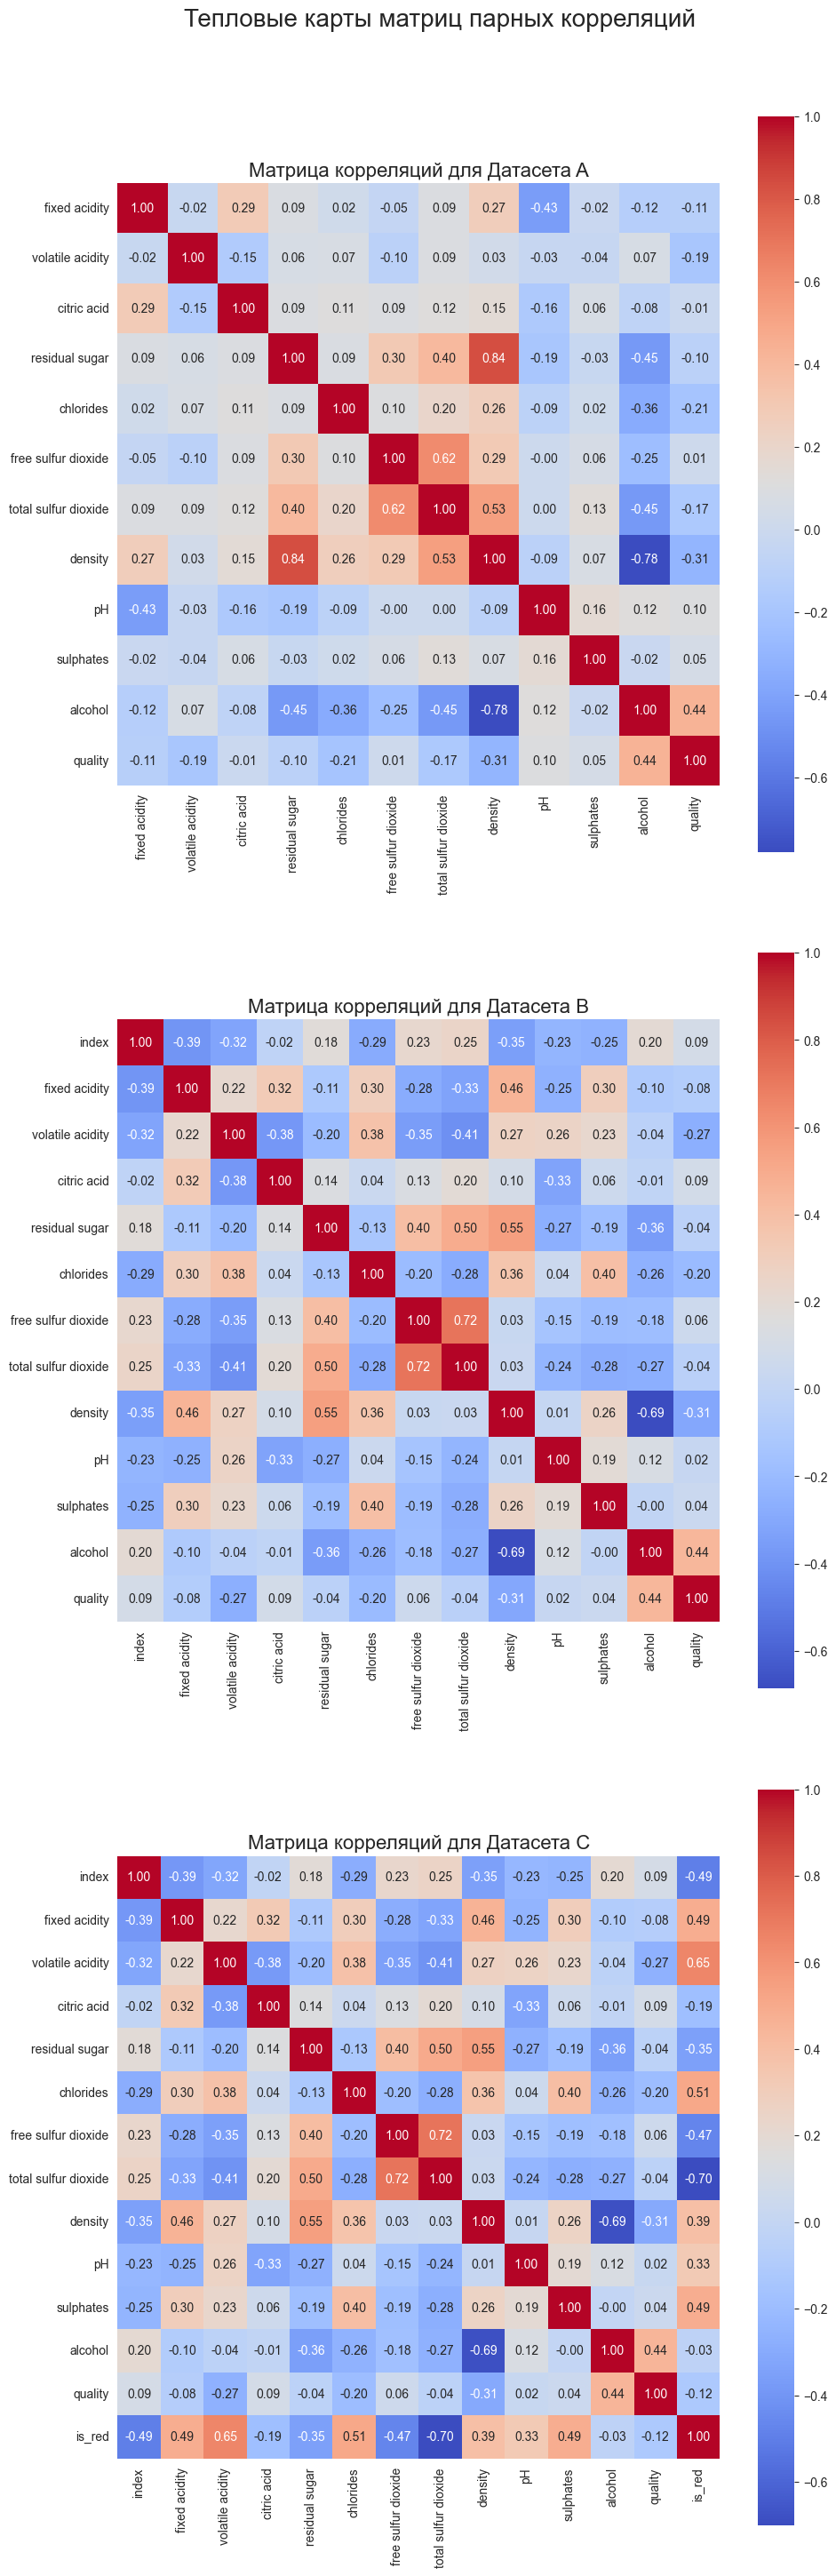

In [13]:
fig, axs = plt.subplots(3, 1, figsize=(10, 30))

def plot_correlation_heatmap(dataframe, ax, title):
    correlation_matrix = dataframe.corr()
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', ax=ax, cbar=True, square=True)
    ax.set_title(title, fontsize=16)

plot_correlation_heatmap(A, axs[0], 'Матрица корреляций для Датасета A')
plot_correlation_heatmap(B, axs[1], 'Матрица корреляций для Датасета B')
plot_correlation_heatmap(C, axs[2], 'Матрица корреляций для Датасета C')

plt.suptitle('Тепловые карты матриц парных корреляций', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Некоторые признаки хорошо коррелируют между собой. С признаком качества сильнее всего коррелирует процент алкоголя. Также есть корреляция цвета и других признаков. С этим можно поработать, должна получиться неплохая моделька.

In [14]:
def z_standardize(dataframe):
    scaler = StandardScaler()
    standardized_data = scaler.fit_transform(dataframe)
    return pd.DataFrame(standardized_data, columns=dataframe.columns)

A_std = z_standardize(A)
B_std = z_standardize(B)
C_std = z_standardize(C)


In [15]:
A_std.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03
mean,-3.481630e-16,4.497106e-16,1.160543e-17,-1.066249e-16,3.133467e-16,-1.015476e-17,-4.642174e-17,3.247201e-14,-1.183754e-15,-8.218098e-16,-3.713739e-16,2.901359e-17
std,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00
min,-3.620351e+00,-1.966985e+00,-2.761743e+00,-1.141944e+00,-1.683274e+00,-1.958677e+00,-3.044230e+00,-2.313038e+00,-3.101408e+00,-2.364709e+00,-2.043297e+00,-3.249862e+00
25%,-6.575011e-01,-6.771010e-01,-5.304757e-01,-9.250474e-01,-4.473347e-01,-7.237750e-01,-7.144739e-01,-7.707066e-01,-6.508363e-01,-6.997104e-01,-8.242757e-01,-9.913739e-01
50%,-6.493106e-02,-1.809917e-01,-1.172780e-01,-2.349217e-01,-1.269060e-01,-7.692173e-02,-1.026189e-01,-9.609320e-02,-5.475133e-02,-1.739212e-01,-9.286267e-02,1.378701e-01
75%,5.276390e-01,4.143393e-01,4.611988e-01,6.918185e-01,1.935226e-01,6.287364e-01,6.739664e-01,6.930457e-01,6.075653e-01,5.271310e-01,7.198184e-01,1.378701e-01
max,8.705106e+00,8.153643e+00,1.095642e+01,1.171411e+01,1.374308e+01,1.491831e+01,7.098444e+00,1.503130e+01,4.184075e+00,5.171602e+00,2.995326e+00,3.525602e+00


Сделали стандартизацию. Данные стали стандартные

Только не надо стандартизировать признак, который хотим предсказывать.

## Реализация нейросети

In [103]:
class Perceptron:
  def __init__(self, hidden_layers : List[int],
               activations: List[Callable],
               eta:Union[int, float] = 1,
               n_epochs: int = 100,
               random_weights=None,
               random_state=None):
    np.random.seed(random_state)
    random.seed(random_state)
    self.is_fitted = False
    self.alpha = 0.3
    self.layers = []
    self.epochs = n_epochs
    self.eta = eta
    self.errors = []
    self.accuracies = []
    l = hidden_layers + [1]
    for i in range(len(hidden_layers)):
      self.layers.append(Layer((l[i]+1, l[i+1]), activations[i], i + 1, random_weights=random_weights))

  @staticmethod
  def relu(x):
      return np.maximum(0, x)
  @staticmethod
  def step(x):
      return (x >= 0).astype(np.float64)

  @staticmethod
  def sigmoid(x):
    return np.where(x >= 0,
                   1 / (1 + np.exp(-x)),
                   np.exp(x) / (1 + np.exp(x)))

  @staticmethod
  def shuffle(X, y):
    n = len(y)
    a = [(random.random(), X[i, :], y[i]) for i in range(n)]
    a.sort()
    new_X = np.array([a[i][1] for i in range(n)])
    new_y = np.array([a[i][2] for i in range(n)])
    return new_X, new_y

  def get_grad(self, activation):
      activation = activation.pyfunc
      if activation == Perceptron.sigmoid:
          s = Perceptron.sigmoid
          return lambda x: s(x) * (1 - s(x))
      elif activation == Perceptron.leaky_relu:
          alpha = 0.3
          return lambda x: (x>=0) + alpha
      return lambda x: (x >= 0).astype(np.int64)

  @staticmethod
  def leaky_relu(x):
      alpha = 0.3
      return x*(x>=0) + alpha*x*(x<0)


  def predict(self, train_sample: NDArray, logging: bool = False) -> NDArray:
    result = np.zeros(train_sample.shape[0])
    for i in range(train_sample.shape[0]):
      x = train_sample[i, :]
      for layer in self.layers:
        x = np.append(x, values=[1]) # добавление свободного коэффициента
        x = layer.forward(x, logging)

      result[i] = x[0]
      if logging:
        print(result[i])
    return result

  def train(self, train_sample: NDArray,
          train_ans: NDArray,
          batch_size: int = 32,  # Размер пакета (можно менять)
          logging=False,
          activation=np.sign,
          random_weights=None) -> list[float]:
    if not self.is_fitted:
        self.layers = [Layer((train_sample.shape[1]+1,
                            self.layers[0].size[0]-1),
                            activation,
                            0,
                            random_weights=random_weights)] + self.layers
        self.is_fitted = True

    n_samples = train_sample.shape[0]
    for epoch in range(self.epochs):
        train_sample, train_ans = Perceptron.shuffle(train_sample, train_ans)
        error = 0

        # Разбиваем данные на пакеты
        for batch_start in range(0, n_samples, batch_size):
            batch_end = min(batch_start + batch_size, n_samples)
            batch_X = train_sample[batch_start:batch_end, :]
            batch_y = train_ans[batch_start:batch_end]

            # Инициализируем накопители градиентов для каждого слоя
            weight_updates = [np.zeros_like(layer.w) for layer in self.layers]
            batch_error = 0

            # Обрабатываем каждый пример в пакете
            for i in range(batch_X.shape[0]):
                x = batch_X[i, :]
                target = batch_y[i]

                # Прямое распространение (forward pass)
                activations = [x]
                for layer in self.layers:
                    x = np.append(x, values=[1])
                    x = layer.forward(x, logging)
                    activations.append(x)

                predicted = x[0]
                delta = target - predicted
                batch_error += abs(delta)

                # Обратное распространение (backward pass)
                delta_next = delta
                for layer_idx in range(len(self.layers)-1, -1, -1):
                    layer = self.layers[layer_idx]
                    layer_input = activations[layer_idx]
                    delta_next, weight_update = layer.backprop(delta_next, layer_input, self.eta)
                    weight_updates[layer_idx] += weight_update  # Накопление градиентов

            # Усредняем градиенты и обновляем веса
            for layer, update in zip(self.layers, weight_updates):
                layer.w += (self.eta / batch_size) * update  # Усреднённое обновление

            error += batch_error

        self.errors.append(error)
        self.accuracies.append(acc(self.predict(train_sample, logging), train_ans))
    return self.errors, self.accuracies


class Layer:
  def __init__(self,
               size: tuple[int, int],
               activation: Callable,
               index: int,
               value: Union[int, float]=0,
               random_weights=None):
    self.size = size
    self.w = np.full(size, value, dtype=np.float64)
    if random_weights is not None:
      self.w = np.random.uniform(random_weights[0], random_weights[1], self.size)
    self.activation = np.vectorize(activation)
    self.i = index
    self.last_result = np.array([])
    self.last_x = np.array([])
    self.last_m = np.array([])

  def backward(self, value) -> None:
    if value > 0:
      # надо увеличить те веса, где нет активации,
      # но должна быть активация
      d = (self.last_x>0)*value
      d = np.repeat(np.array([d]).T, self.w.shape[1], axis=1)
      self.w = self.w + d
    if value < 0:
      # надо уменьшить те веса,
      # где активации быть не должно
      d = (self.last_x>0)*value
      d = np.repeat(np.array([d]).T, self.w.shape[1], axis=1)
      self.w = self.w + d
  def backprop(self, delta_prev, layer_input, eta):
    # Получаем взвешенную сумму (последний расчёт в forward)
    m = self.last_m

    # Вычисляем производную активационной функции
    grad = Perceptron([], []).get_grad(self.activation)(m)

    # delta для текущего слоя = delta_prev * производная активации
    delta = delta_prev * grad

    # Добавляем bias-единицу к входному вектору (если её ещё нет)
    layer_input_with_bias = np.append(layer_input, 1)

    # Возвращаем ошибку для предыдущего слоя (без учёта bias-весов)
    delta_next = delta @ self.w[:-1].T

    # Возвращаем градиент для накопления (без обновления весов)
    weight_update = np.outer(layer_input_with_bias, delta)

    return delta_next, weight_update

  def forward(self, x, logging) -> NDArray:
    if logging:
      print(f"Слой №{self.i+1}")
      print(f"Сенсоры  : {x}")
      print(f"Размер: {self.size}")

    m = np.dot(x, self.w)
    result = self.activation(m)
    self.last_result = result
    self.last_x = x
    self.last_m = m
    if logging:
      print(f"Сумматор : {m}")
      print(f"Активация: {result}")
      print(f"Результат размера {result.shape}")

    return result

def count_metrics(predicted : NDArray[bool], real: NDArray[bool], label='') -> None:
    print(f'{label}: ')
    print('Accuracy: ', acc(predicted, real))
    print('Recall: ', rec(predicted, real))
    print('Precision: ', pre(predicted, real))


def get_features(data, target, target_name, features) -> (NDArray, NDArray):

    data = data[features + [target]]
    data.loc[:, target] = (data[target] == target_name)
    data_y = data[[target]].to_numpy().reshape(1, -1)[0] * 1
    data_x = data[features].to_numpy()

    return data_x, data_y


def build_errors(errors: list[float], perceptron: Perceptron) -> None:

    plt.plot(list(range(len(errors))), errors, marker='o', linestyle='dashed')

    plt.xlabel("Эпохи")



In [56]:
encoder = LabelEncoder()
X = z_standardize(pd.concat([df_red.drop(['quality'], axis=1), df_white.drop(['quality'], axis=1)]).reset_index()).to_numpy()
y = encoder.fit_transform(np.array(pd.concat([df_red['quality'], df_white['quality']], axis=0)))




In [57]:
min(y)

np.int64(0)

In [58]:
def print_contour(model, X, y, main_1=0, main_2=1, supp=None, columns_num=None):
    # 1. Генерируем сетку для 2-х выбранных признаков
    if supp is None:
        supp = [2, 3]
    if columns_num is None:
        columns_num = [''] * 2
    x_min, x_max = X[:, main_1].min() - 1, X[:, main_1].max() + 1
    y_min, y_max = X[:, main_2].min() - 1, X[:, main_2].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    # 2. Создаём массив точек в 4-х мерном пространстве, но только для выбранных 2-х признаков
    mean_vals = np.mean(X, axis=0)  # Средние значения для всех 4-х признаков
    fixed_features = mean_vals[supp]  # Средние значения для 3-го и 4-го признаков

    grid_points_4d = np.zeros((xx.ravel().shape[0], 2+len(supp)))
    grid_points_4d[:, [main_1, main_2]] = np.column_stack((xx.ravel(), yy.ravel()))  # 2 выбранных признака
    grid_points_4d[:, [supp]] = fixed_features  # Остальные 2 признака - средние значения

    # 3. Предсказываем классы для сеточных точек в 4-х мерном пространстве
    Z = model.predict(grid_points_4d)
    Z = Z.reshape(xx.shape)

    # 4. Визуализация
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
    plt.contour(xx, yy, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], linewidths=[1, 2, 1])

    # Отображаем точки данных
    plt.scatter(X[:, main_1], X[:, main_2], c=y, cmap='coolwarm', edgecolor='k')
    plt.xlabel(columns_num[main_1])
    plt.ylabel(columns_num[main_2])
    plt.title('Проекция линий уровня персептрона на 2D')
    plt.show()



## Основное Задание 1

1. Разделите датасет на обучающую (≈85%) и тестовую  (≈15%) выборки.
2. Выделите из обучающей выборки собственно обучающую и валидационную (контрольную) выборки. Используйте валидацонную выборку для настройки гиперпараметров модели.
3. В ходе обучения используйте приём минибатчей и сравните эффективность (точность и время работы) трех вариантов размера минибатча: 1 шт, 5%, 20%. Результаты выведите в виде таблицы. Напишите выводы.
4. Оцените эффективность использования разного числа эпох обучения и сравните их эффективность (точность и время работы). Выберите три варианта числа эпох так, чтобы разница в эффективности была заметна. Результаты выведите в виде таблицы. Напишите выводы.
5. Исследуйте зависимость эффективности работы классификатора от размера скрытого слоя. Сделайте расчёты для 5 вариантов количества нейронов скрытого слоя (от 10 до нескольких тысяч). Результаты сведите в отдельную таблицу. Напишите выводы.
6. Постройте и примените классификатор, настроив параметры, исследованные в п.п. 3,4,5, наиболее эффективным образом. Постройте графики падения величины ошибки классификатора в процессе обучения и роста точности классификации на обучающей и контрольной выборках. Сравните точности обученного классификатора на обучающей, контрольной и тестовой выборках.


### Задание 1.1

Разделите датасет на обучающую (≈85%) и тестовую  (≈15%) выборки.




In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)




Подбор гиперпараметров

In [ ]:
for layers in [5, 10, 30, 500, 1000]:
    for batches in [1/len(X_train), 0.05, 0.2]:
        for epochs in [5, 10, 30]:
            temp_model = Perceptron([layers, 10], [Perceptron.sigmoid,  lambda x: min(Perceptron.relu(x).astype(np.int64), 6)], n_epochs=epochs, random_state=13, eta=0.005)
            errors, accuracies = temp_model.train(np.array(X_train, dtype=np.float64), np.array(y_train, dtype=np.float64) , logging=False, activation=lambda x: x, batch_size=int(len(X_train)*batches), random_weights=[-3, 3])

            models.append({"model": temp_model, "errors": errors, "acc": accuracies, "batches": batches, "epochs": epochs, "layers": layers})
            print(len(models))


30


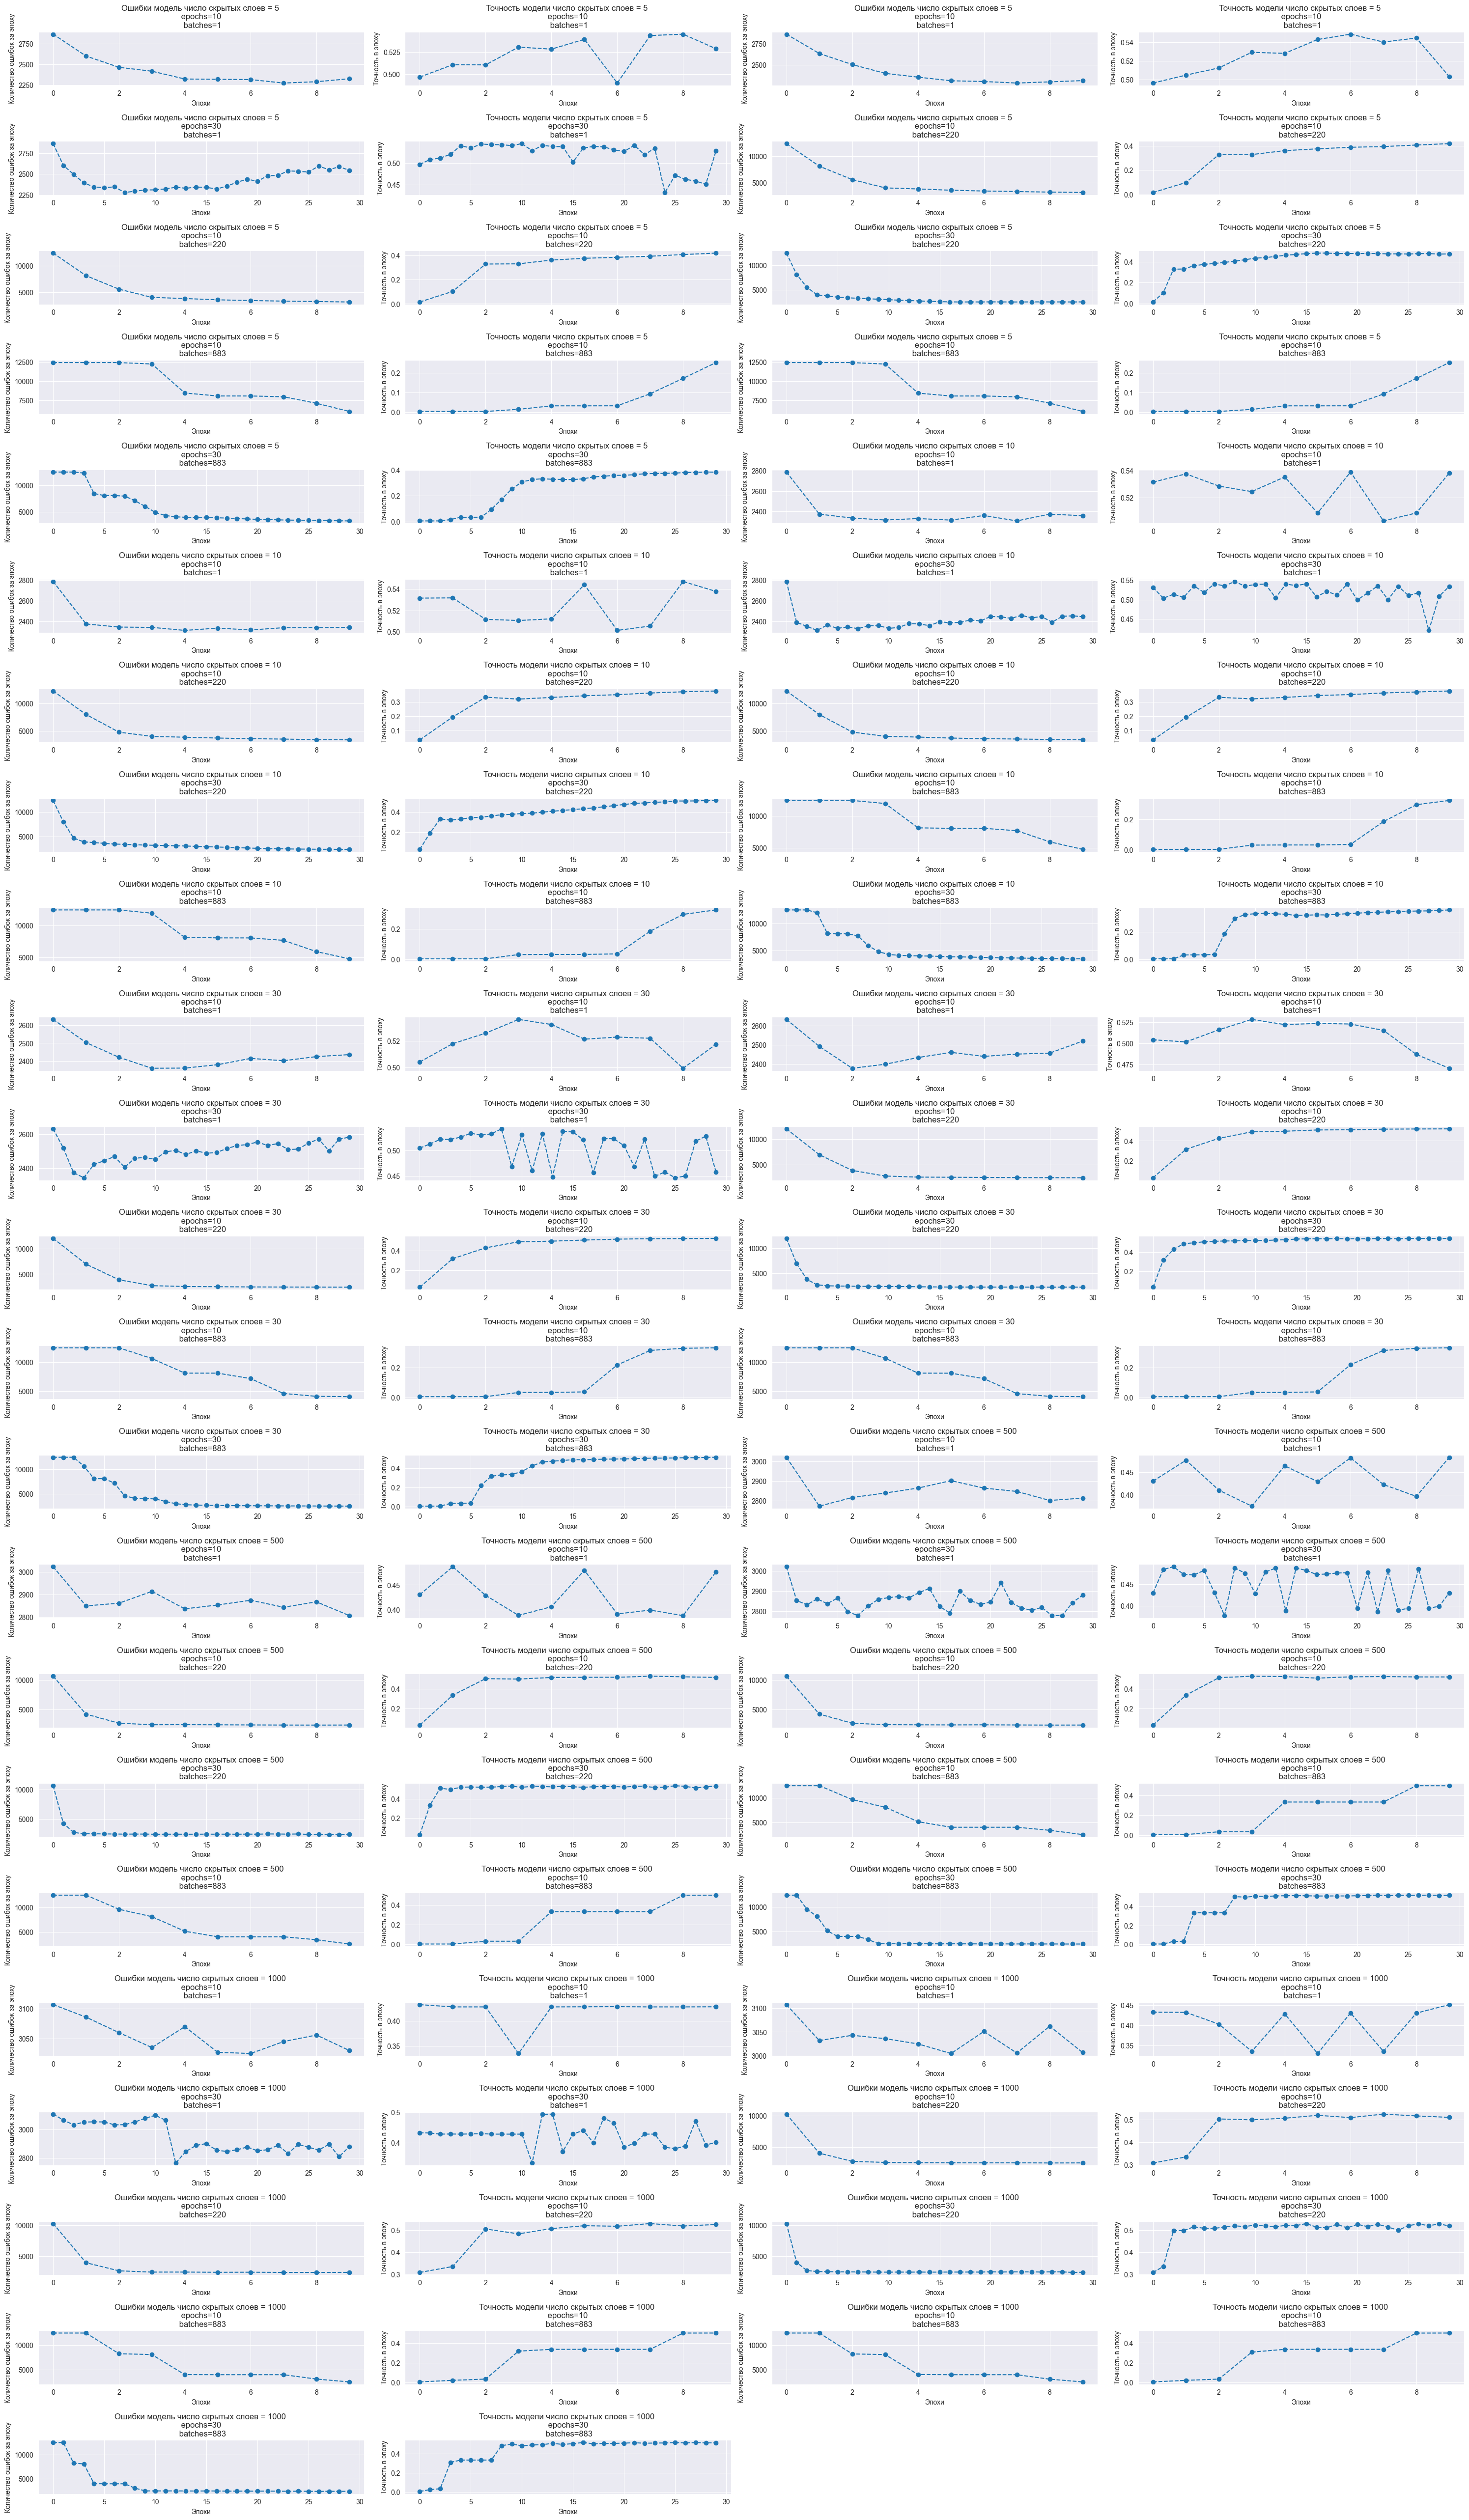

In [141]:
plt.figure(figsize=(30, 100))


for i, model in enumerate(models):
    plt.subplot(len(models), 4, 2*i+1)
    plt.ylabel("Количество ошибок за эпоху")
    plt.title(f"Ошибки модель число скрытых слоев = {model["layers"]} \n epochs={model['epochs']} \n batches={int(len(X_train)*model['batches'])}")
    build_errors(model["errors"], model["model"])
    plt.subplot(len(models), 4, 2*i+2)
    build_errors(model["acc"], model["model"])
    plt.ylabel("Точность в эпоху")
    plt.title(f"Точность модели число скрытых слоев = {model["layers"]} \n epochs={model['epochs']} \n batches={int(len(X_train)*model['batches'])}")
    plt.tight_layout()
    plt.subplots_adjust()


In [140]:
temp_models  = list(models)
df = pd.DataFrame(temp_models)

# Для каждого эксперимента берем последнее значение accuracy (последняя эпоха)
df['final_acc'] = df['acc'].apply(lambda x: x[-1]).round(2)
df['batches'] = (df['batches']*len(X_train)).astype(int)
# Создаем сводную таблицу
grouped = df.groupby(['layers', 'epochs', 'batches',])['final_acc'].apply(np.max)
print(grouped)


layers  epochs  batches
5       10      1          0.53
                220        0.42
                883        0.25
        30      1          0.53
                220        0.47
                883        0.38
10      10      1          0.54
                220        0.38
                883        0.32
        30      1          0.53
                220        0.52
                883        0.36
30      10      1          0.52
                220        0.52
                883        0.33
        30      1          0.46
                220        0.54
                883        0.51
500     10      1          0.48
                220        0.52
                883        0.50
        30      1          0.43
                220        0.53
                883        0.52
1000    10      1          0.45
                220        0.53
                883        0.50
        30      1          0.40
                220        0.52
                883        0.52
Name: final_acc,

In [121]:
pivot_table = df.pivot_table(
    values='final_acc',
    index='layers',
    columns='epochs'
)
print(pivot_table)

epochs        10        30
layers                    
5       0.395555  0.462078
10      0.413063  0.468946
30      0.449664  0.505547
500     0.499208  0.492868
1000    0.486190  0.479360


In [160]:
best_classifier = Perceptron([10, 10], [Perceptron.sigmoid,  lambda x: min(Perceptron.relu(x).astype(np.int64), 6)], n_epochs=6, random_state=13, eta=0.005)
errors, accuracies = best_classifier.train(np.array(X_train, dtype=np.float64), np.array(y_train, dtype=np.float64) , logging=False, activation=lambda x: x, batch_size=1, random_weights=[-3, 3])


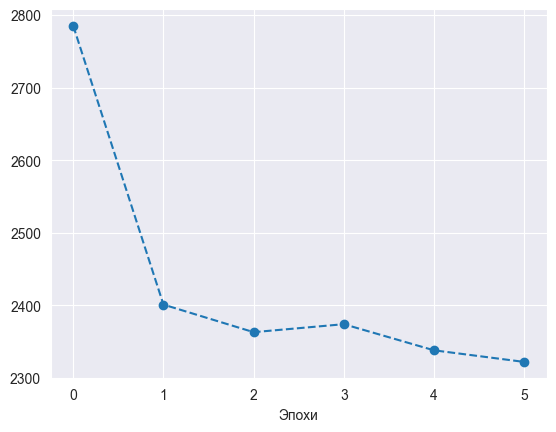

In [161]:
build_errors(errors, best_classifier)


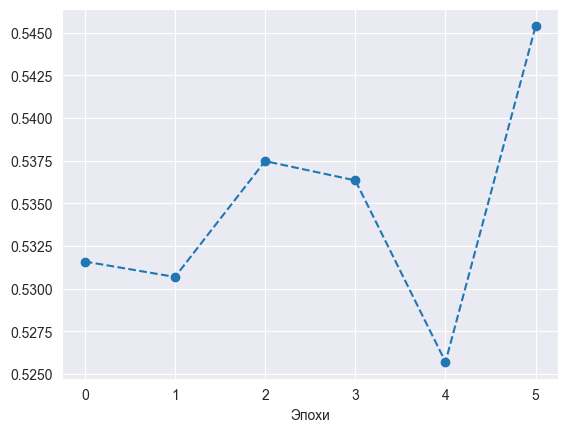

In [162]:
build_errors(accuracies, best_classifier)

In [164]:
print(acc(best_classifier.predict(X_train), y_train))
print(acc(best_classifier.predict(X_val), y_val))
print(acc(best_classifier.predict(X_test), y_test))

0.5453928005433553
0.5420814479638009
0.5282051282051282


In [181]:
X_B = z_standardize(B.drop(["quality"], axis=1).reset_index()).to_numpy()
y_B = encoder.fit_transform(B["quality"])
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_B, y_B, test_size=0.2, random_state=42)
X_train_b, X_val_b, y_train_b, y_val_b = train_test_split(X_train_b, y_train_b, test_size=0.2, random_state=42)

In [187]:
classifier_b = Perceptron([10, 10], [Perceptron.sigmoid,  lambda x: min(Perceptron.relu(x).astype(np.int64), 6)], n_epochs=4, random_state=13, eta=0.005)

In [188]:
errors, accuracies = classifier_b.train(np.array(X_train_b, dtype=np.float64), np.array(y_train_b, dtype=np.float64) , logging=False, activation=lambda x: x, batch_size=1, random_weights=[-3, 3])

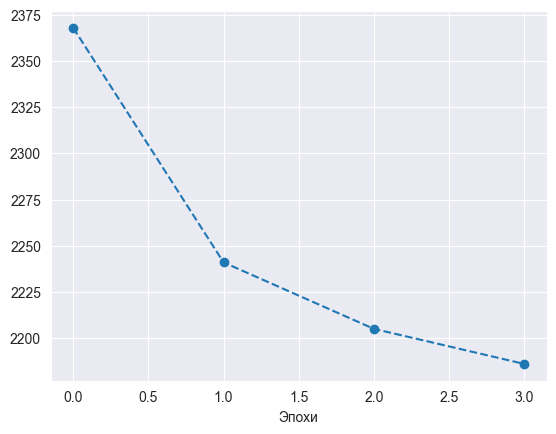

In [189]:
build_errors(errors, classifier_b)


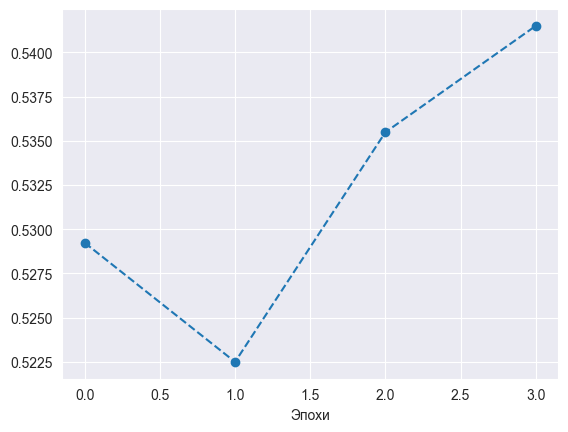

In [190]:
build_errors(accuracies, classifier_b)

In [192]:
print(acc(classifier_b.predict(X_train_b), y_train_b))
print(acc(classifier_b.predict(X_val_b), y_val_b))
print(acc(classifier_b.predict(X_test_b), y_test_b))

0.5414962713495309
0.5461538461538461
0.536923076923077


In [208]:
X_C = z_standardize(C.drop(["quality"], axis=1).reset_index()).to_numpy()
y_C = encoder.fit_transform(C["quality"])
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_C, y_C, test_size=0.2, random_state=42)
X_train_c, X_val_c, y_train_c, y_val_c = train_test_split(X_train_c, y_train_c, test_size=0.2, random_state=42)
classifier_c = Perceptron([10, 10], [Perceptron.sigmoid, lambda x: min(Perceptron.relu(x).astype(np.int64), 6)],
                          n_epochs=7, random_state=13, eta=0.005)
errors, accuracies = classifier_c.train(np.array(X_train_c, dtype=np.float64), np.array(y_train_c, dtype=np.float64),
                                        logging=False, activation=lambda x: x, batch_size=1, random_weights=[-3, 3])

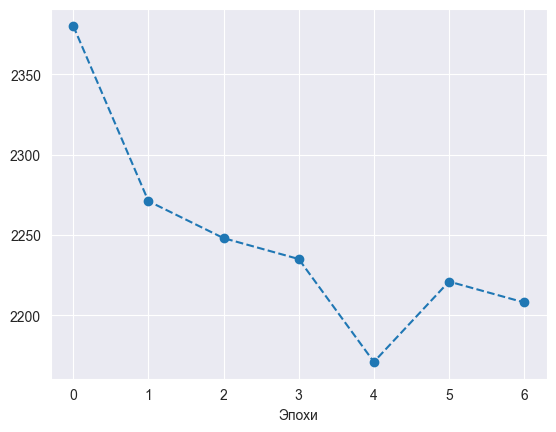

In [209]:
build_errors(errors, classifier_c)

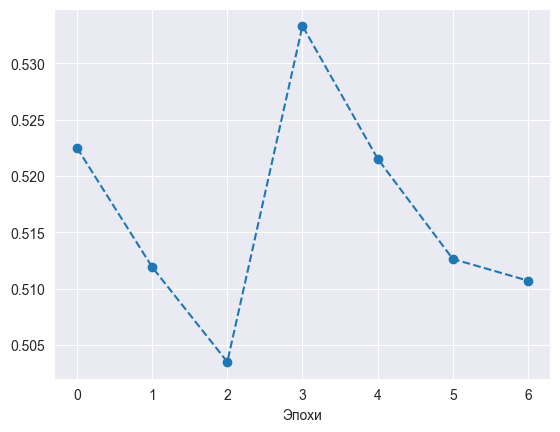

In [210]:

build_errors(accuracies, classifier_c)

In [207]:
print(acc(classifier_c.predict(X_train_c), y_train_c))
print(acc(classifier_c.predict(X_val_c), y_val_c))
print(acc(classifier_c.predict(X_test_c), y_test_c))

0.5275439018522974
0.5307692307692308
0.5238461538461539
